# Spam versus Ham detection

In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [3]:
messages= [line.rstrip() for line in open('SMSSpamCollection')]

In [80]:
type(messages)

list

In [6]:
print (len(messages))

5574


In [8]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [9]:
for number, message in enumerate(messages[:11]):
    print (number, message)
    print ('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [10]:
import pandas

In [12]:
data= pandas.read_csv('SMSSpamCollection', sep= '\t', names=['labels','message'])

In [14]:
data.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
data.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [20]:
data.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [23]:
data['length']= data['message'].apply(len)

In [24]:
data.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
data[data['length']== 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [42]:
data['length'].values

array([111,  29, 155, ...,  57, 125,  26], dtype=int64)

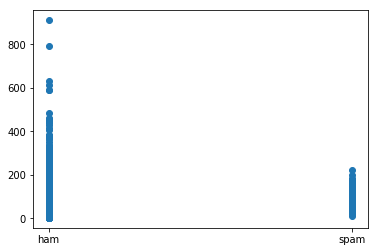

In [38]:
plt.scatter(data['labels'], data['length'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0E98EBF0>,
      dtype=object)

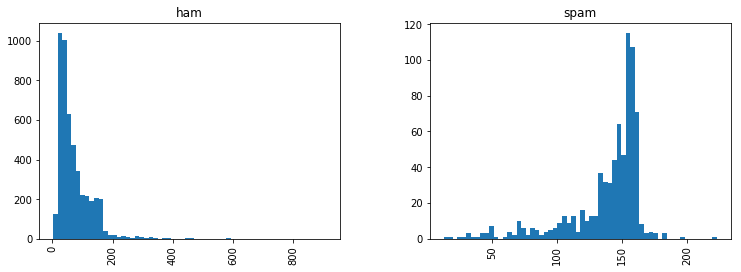

In [48]:
data.hist(column= 'length', by='labels', bins= 60, figsize=(12,4))

In [81]:
import string
from nltk.corpus import stopwords

In [82]:
def text_process(mess):
    nopunc=  [char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]



In [84]:
data['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, treat, like, aids...
7       [per, request, Melle, Melle, Oru, Minnaminungi...
8       [WINNER, valued, network, customer, selected, ...
9       [mobile, 11, months, U, R, entitled, Update, l...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, 100, 20000, pounds, ...
12      [URGENT, 1, week, FREE, membership, £100000, P...
13      [Ive, searching, right, words, thank, breather...
14                                         [DATE, SUNDAY]
15      [XXXMobileMovieClub, use, credit, click, WAP, ...
16                                    [Oh, kim, watching]
17      [Eh, u

In [85]:
data['message'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
bow_transformer= CountVectorizer(analyzer= text_process).fit(data['message'])

In [97]:
print(len(bow_transformer.vocabulary_))

11425


In [98]:
mess5= data['message'][5]

In [100]:
print (mess5)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


In [102]:
bow5= bow_transformer.transform([mess5])

In [106]:
print (bow5)

  (0, 543)	1
  (0, 1943)	1
  (0, 2222)	1
  (0, 2346)	1
  (0, 3930)	1
  (0, 4379)	1
  (0, 4893)	1
  (0, 5467)	1
  (0, 5864)	1
  (0, 6755)	1
  (0, 7800)	1
  (0, 8567)	1
  (0, 9209)	1
  (0, 9641)	1
  (0, 10073)	1
  (0, 10093)	1
  (0, 11011)	1
  (0, 11150)	1
  (0, 11371)	1


In [109]:
bow_transformer.get_feature_names()[3930]

'Tb'

In [110]:
messages_bow= bow_transformer.transform(data['message'])

In [111]:
data.message.apply(len)

0       111
1        29
2       155
3        49
4        61
5       147
6        77
7       160
8       157
9       154
10      109
11      136
12      155
13      196
14       35
15      149
16       26
17       81
18       56
19      155
20       41
21       47
22       52
23       88
24       57
25      144
26       30
27      134
28       75
29       64
       ... 
5542     40
5543     38
5544    154
5545     45
5546     42
5547    160
5548     34
5549     87
5550     43
5551     51
5552     91
5553     27
5554     98
5555    153
5556     63
5557    273
5558     22
5559     66
5560     33
5561     70
5562     96
5563     19
5564     67
5565     12
5566    147
5567    160
5568     36
5569     57
5570    125
5571     26
Name: message, Length: 5572, dtype: int64

In [113]:
messages_bow.shape

(5572, 11425)

In [115]:
messages_bow.nnz #sape of the sparse matrix

50548